In [139]:
import pandas as pd
import numpy as np

In [140]:
df=pd.read_csv("/Bengaluru_House_Data.csv")

In [141]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [142]:
print(df.columns,'\n',df.shape,'\n',df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object') 
 (13320, 9) 
 None


In [143]:
for i in df.columns:
    print(df[i].value_counts())
    print("*"*50)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
**************************************************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
**************************************************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name

In [144]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [145]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [146]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [147]:
df.describe()
# only for numerical columns

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [149]:
df['location']=df['location'].fillna('Sarjapur Road')
df['location'].info()
#replaced the value by sarjapur's value


<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: location
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [150]:
df.isna().sum()

,0
location,0
size,16
total_sqft,0
bath,73
price,0


In [151]:
df['size'].value_counts()
df['size']=df['size'].fillna('2 BHK')
df.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,73
price,0


In [152]:
df['bath'].value_counts()
df['bath']=df['bath'].fillna(df['bath'].median())
df.isna().sum()

# replaced by median()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [153]:
df['bath'].median()

2.0

In [154]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)
df['bhk']

,bhk
0,2
1,4
2,3
3,3
4,2
...,...
13315,5
13316,4
13317,2
13318,4


In [155]:
df[df.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [156]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [157]:
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
            return None

In [158]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [159]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### price per squarefeet

In [160]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [161]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Mango Garden Layout,1
Milk Colony,1
"Basnashankari,6th stage,",1


In [162]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()
# the front and back space between the numbers
#is removed witht eh strip function


In [163]:
df['location'].value_counts()

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Xavier Layout,1
Ramanagara Channapatna,1
Maheswari Nagar,1


In [164]:
location_less_10=location_count[location_count<=10]
location_less_10

,count
location,
1st Block Koramangala,10
Dairy Circle,10
Nagadevanahalli,10
Sadashiva Nagar,10
Naganathapura,10
...,...
Xavier Layout,1
Ramanagara Channapatna,1
Maheswari Nagar,1


In [165]:
df['location']=df['location'].apply(lambda x:'other' if x in location_less_10 else x)

In [166]:
df['location'].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Tindlu,11
Marsur,11
2nd Phase Judicial Layout,11


### Outlier Detection and Removal

In [167]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [168]:
(df['total_sqft']/df['bhk']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [169]:
df=df[((df['total_sqft']/df['bhk']) >= 300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [170]:
def remove_outliers_sqft(data):
    data_output = pd.DataFrame()
    for key, subdf in data.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        gen_data = subdf[(subdf.price_per_sqft > (m - st)) &
                         (subdf.price_per_sqft <= (m + st))]
        data_output = pd.concat([data_output, gen_data], ignore_index=True)

    return data_output

df = remove_outliers_sqft(df)
df.describe()


,total_sqft,bath,price,bhk,price_per_sqft
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [171]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(
                    exclude_indices,
                    bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values
                )
    return df.drop(exclude_indices, axis='index')


In [172]:
df=bhk_outlier_remover(df)

In [173]:
df.shape

(7361, 7)

In [174]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [175]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

### Cleaned data

In [176]:
df.head(1)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4


In [177]:
df.to_csv('Cleaned_data.csv')

In [178]:
X=df.drop(columns=['price'])
y=df['price']
# price is the target column

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score


In [180]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [181]:
print(X_train.shape,'\n',X_test.shape)

(5888, 4) 
 (1473, 4)


# Linear Regression

In [182]:
column_trans= make_column_transformer((OneHotEncoder(sparse_output=False),['location']), remainder='passthrough')

In [183]:
scalar=StandardScaler()

In [184]:
lr = make_pipeline(StandardScaler(), LinearRegression())

In [185]:
pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), LinearRegression())


In [186]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('linearregression', LinearRegression())])

In [187]:
y_pred_lr = pipe.predict(X_test)

In [188]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_pred_lr.shape)


(5888, 4) (5888,)
(1473, 4) (1473,)
(1473,)


In [189]:
print("R² Score:", r2_score(y_test, y_pred_lr))

R² Score: 0.8233783132019377


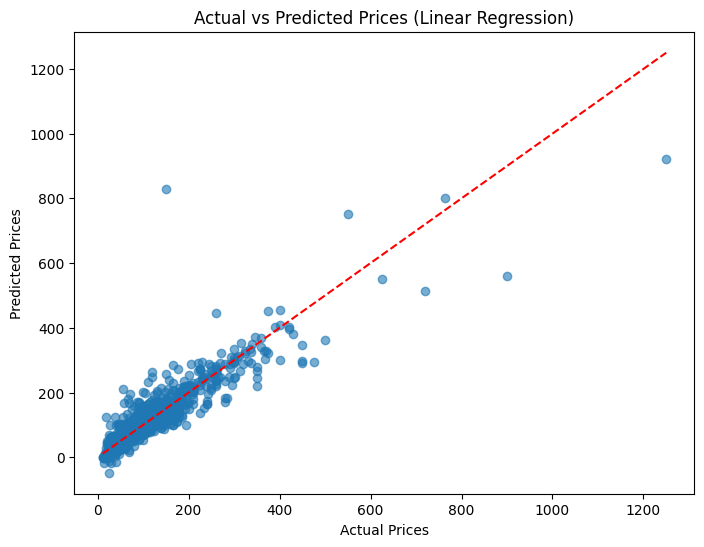

In [190]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')  # Perfect prediction line
plt.show()


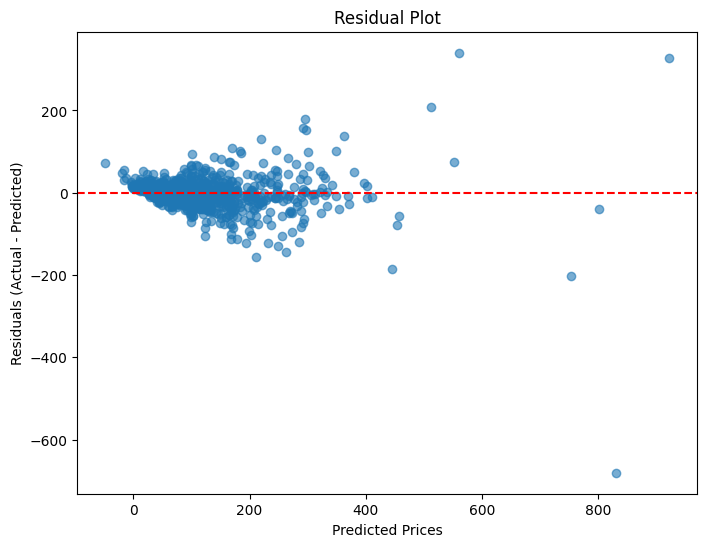

In [191]:
residuals = y_test - y_pred_lr

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.6)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [192]:
print(pipe.named_steps.keys())


dict_keys(['columntransformer', 'standardscaler', 'linearregression'])


## Applying Lasso

In [193]:
lasso = Lasso()

In [194]:
pipe = make_pipeline(column_trans,scalar,lasso)

In [195]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [196]:
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8128285650772719

R² Score: 0.8128285650772719
RMSE: 36.65021598591399


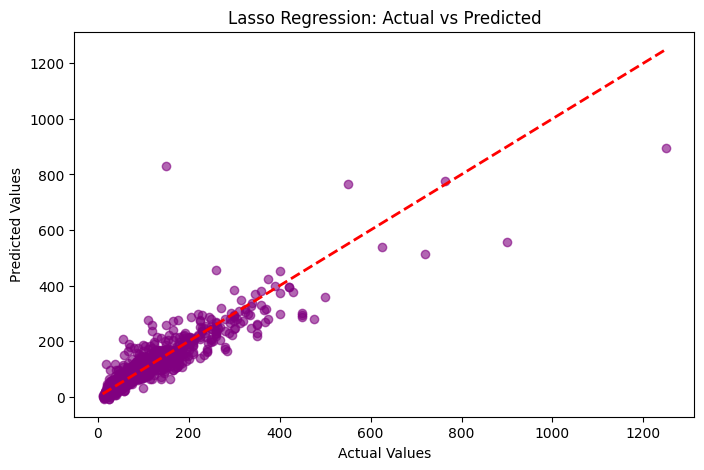

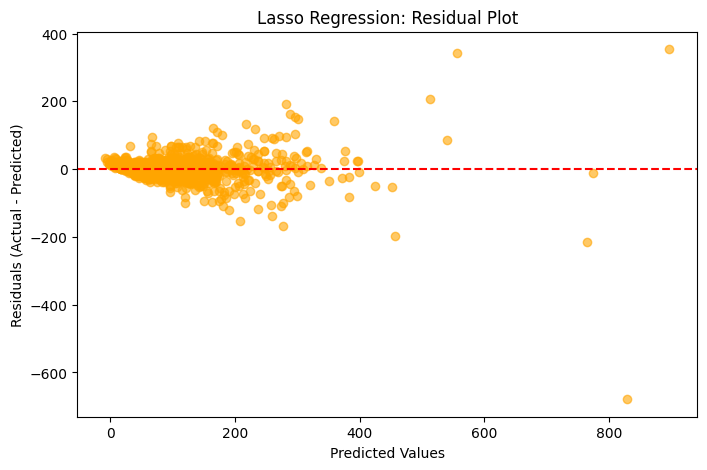

In [197]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# y_pred_lasso already calculated
print("R² Score:", r2_score(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

# --- Scatter Plot: Actual vs Predicted ---
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lasso, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()

# --- Residual Plot ---
residuals = y_test - y_pred_lasso
plt.figure(figsize=(8,5))
plt.scatter(y_pred_lasso, residuals, color='orange', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Lasso Regression: Residual Plot")
plt.show()


## Ridge Reg

In [198]:

# Create pipeline
ridge = Ridge()
pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), ridge)


In [199]:
# Fit the model
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridge', Ridge())])

In [200]:
# Predict and Evaluate
y_pred_ridge = pipe.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred_ridge))

R² Score: 0.8234146633312639


R² Score: 0.8234146633312639
RMSE: 35.598694563891975


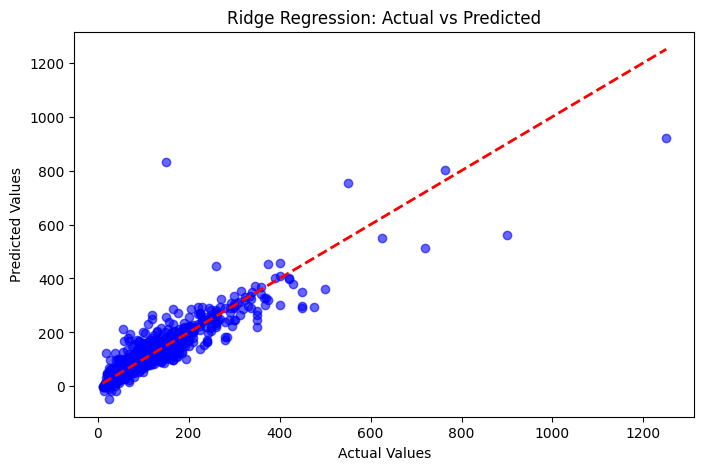

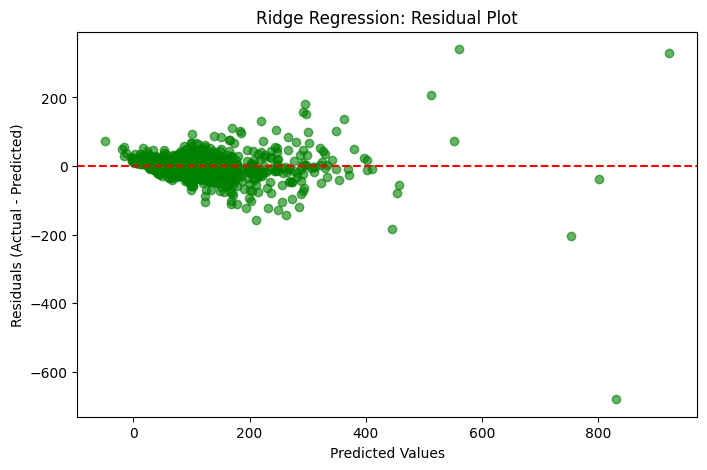

In [201]:


# y_pred_ridge already calculated
print("R² Score:", r2_score(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

# --- Scatter Plot: Actual vs Predicted ---
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

# --- Residual Plot ---
residuals = y_test - y_pred_ridge
plt.figure(figsize=(8,5))
plt.scatter(y_pred_ridge, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Ridge Regression: Residual Plot")
plt.show()


### Decision Tree

In [202]:
from sklearn.tree import DecisionTreeRegressor


# Column transformer for OneHotEncoding location column
column_trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), ['location']),
    remainder='passthrough'
)

# Create Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=0, max_depth=10)  # Adjust max_depth for better results

# Pipeline: OHE -> Scaling -> Decision Tree
pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), tree)

# Train model
pipe.fit(X_train, y_train)

# Predict
y_pred_tree = pipe.predict(X_test)

# Evaluate
print("Decision Tree R² Score:", r2_score(y_test, y_pred_tree))


Decision Tree R² Score: 0.7567191554118539


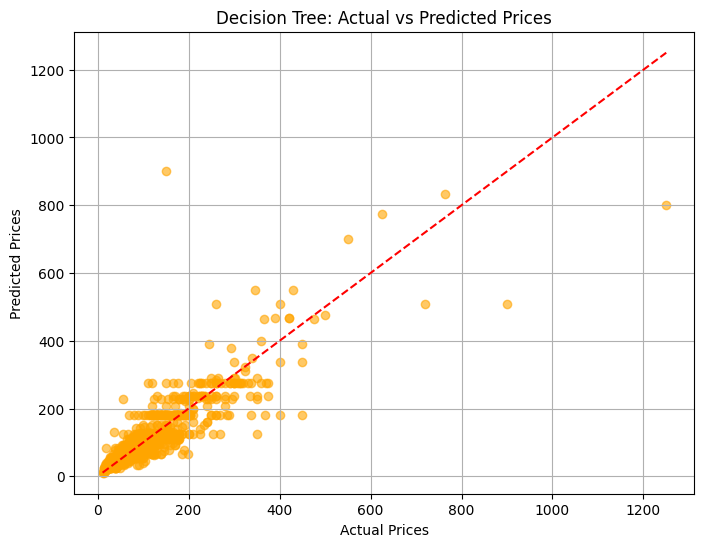

In [203]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_tree, alpha=0.6, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted Prices")
plt.grid(True)
plt.show()


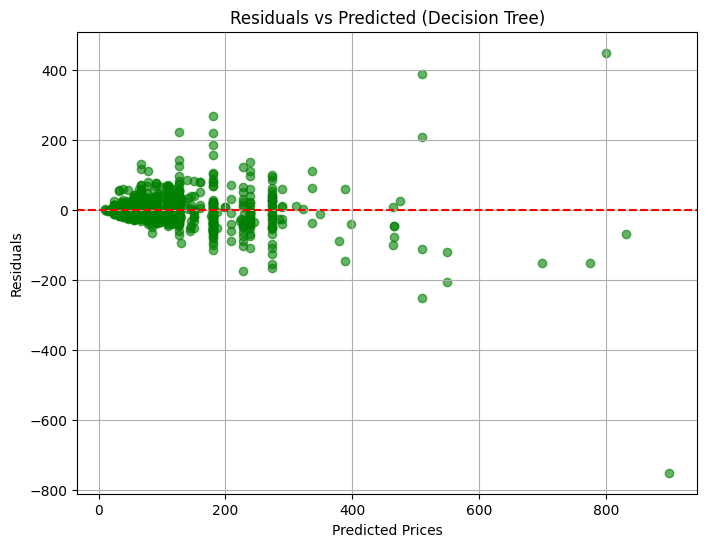

In [204]:
residuals = y_test - y_pred_tree

plt.figure(figsize=(8,6))
plt.scatter(y_pred_tree, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Decision Tree)")
plt.grid(True)
plt.show()


Model type: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Has .tree_ attribute: True


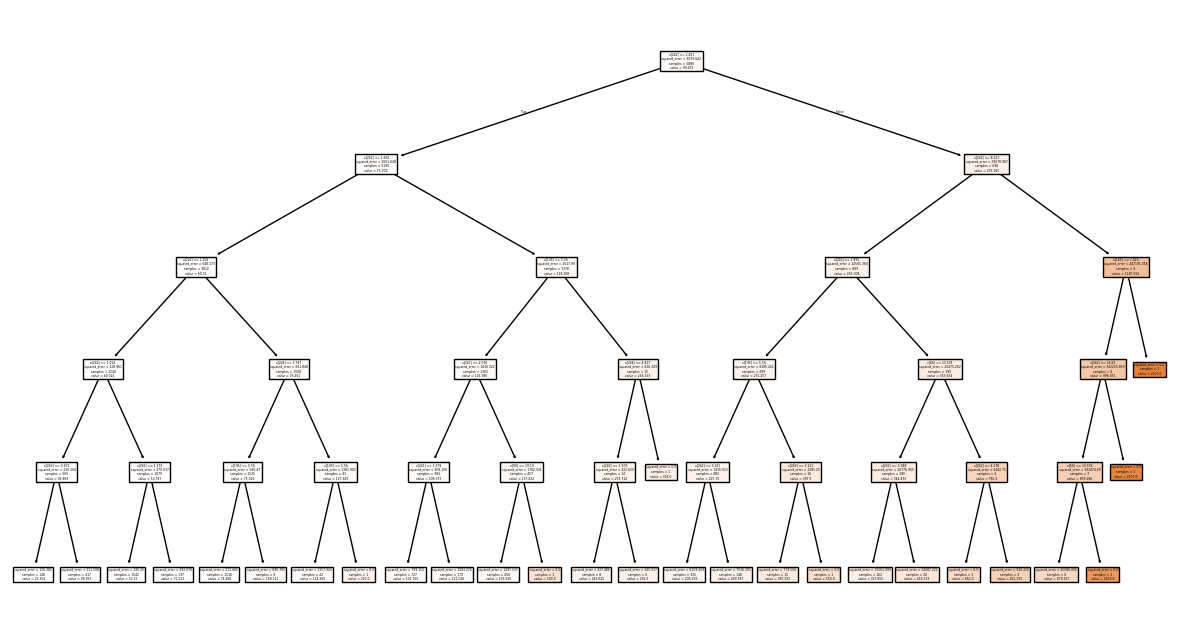

In [205]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train decision tree pipeline again to be sure
tree = DecisionTreeRegressor(random_state=0, max_depth=5)
tree_pipe = make_pipeline(column_trans, StandardScaler(with_mean=False), tree)
tree_pipe.fit(X_train, y_train)

# Extract decision tree model
tree_model = tree_pipe.named_steps['decisiontreeregressor']
print("Model type:", type(tree_model))
print("Has .tree_ attribute:", hasattr(tree_model, "tree_"))

# Simple plot (no feature names for now, just test if it works)
plt.figure(figsize=(15, 8))
plot_tree(tree_model, filled=True)
plt.show()
